# 결정트리


## 공통

In [1]:
# %config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [2]:
import mglearn

In [3]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

matplotlib.rc("font", family="Malgun Gothic")
# matplotlib.rc("font", family="AppleGothic")
# matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams["axes.unicode_minus"] = False

plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 300
plt.rcParams["image.cmap"] = "viridis"
plt.rcParams["image.interpolation"] = "none"
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["legend.numpoints"] = 1
plt.rc(
    "axes",
    prop_cycle=(
        cycler("color", mglearn.plot_helpers.cm_cycle.colors)
        + cycler("linestyle", ["-", "-", "--", (0, (3, 3)), (0, (1.5, 1.5))])
    ),
)

np.set_printoptions(precision=3, suppress=True)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

## 연습문제 01

### 연습문제01. load_iris 데이터를 로드하고, 데이터를 탐색하세요.
- 데이터셋의 특성과 타깃(target)의 개수를 확인하세요.
- 각 특성의 기초 통계 정보를 출력하세요.

In [4]:
# 데이터 로드 및 객체 생성(기초 통계 자료를 출력하기 위해)
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
# pandas를 이용해서 단일 데이터
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["target"])
print(f"특성 : {len(X)}, 타깃 : {len(y)}")
print(" 기초 통계 : \n")
X.describe()



특성 : 150, 타깃 : 150
 기초 통계 : 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### 연습문제01-2. 데이터를 학습 데이터와 테스트 데이터로 나누세요.
- 학습 데이터와 테스트 데이터의 크기를 출력하세요.
    - 데이터 분할은 train_test_split 함수를 사용하세요.
    - 학습 데이터와 테스트 데이터의 비율은 80:20으로 설정하세요.

In [6]:
from sklearn.model_selection import train_test_split 

# 데이터 분리(학습, 테스트)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
print(f"훈련 데이터 X의 크기 : {len(X_train)}")
print(f"테스트 데이터 X의 크기 : {len(X_test)}")
print(f"훈련 데이터 y의 크기 : {len(y_train)}")
print(f"테스트 데이터 y의 크기 : {len(y_test)}")


훈련 데이터 X의 크기 : 120
테스트 데이터 X의 크기 : 30
훈련 데이터 y의 크기 : 120
테스트 데이터 y의 크기 : 30


### 연습문제01-3. DecisionTreeClassifier를 사용하여 모델을 생성하세요.
- 학습 데이터를 사용하여 모델을 학습시키세요.
- 학습 완료 후, 학습 데이터에 대한 정확도를 출력하세요

In [7]:
# 모델 학습 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(f" 학습 데이터에 대한 정확도 : {dt.score(X_train, y_train)}")


 학습 데이터에 대한 정확도 : 1.0


### 연습문제04. 학습된 모델을 사용하여 테스트 데이터를 예측하세요.
- 테스트 데이터에 대한 정확도를 출력하세요.
- classification_report를 사용하여 평가 결과를 상세히 출력하세요.

In [8]:
y_pred = dt.predict(X_test)
y_pred
print(f"테스트 데이터에 대한 정확도 : {dt.score(X_test, y_test)}")

테스트 데이터에 대한 정확도 : 1.0


In [13]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = dt.predict(X_test)

print(f"테스트 데이터에 대한 정확도 : {accuracy_score(y_pred,y_test)}")
print(classification_report(y_pred,y_test, target_names=iris.target_names))
print(y_pred, y_test)
# 아래 데이터를 보고 인사이트를 도출하여 상대방을 설득하려고 해야한다.
# 데이터를 잘게 나누어서 인사이트를 도출하려는 노력을 해야한다.

테스트 데이터에 대한 정확도 : 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]      target
73        1
18        0
118       2
78        1
76        1
31        0
64        1
141       2
68        1
82        1
110       2
12        0
36        0
9         0
19        0
56        1
104       2
69        1
55        1
132       2
29        0
127       2
26        0
128       2
131       2
145       2
108       2
143       2
45        0
30        0


### 연습문제05. 학습된 결정 트리를 시각화하세요.
- plot_tree 함수를 사용하여 결정 트리의 구조를 그리세요.
- 트리 시각화를 통해 어떤 특성이 중요한지 설명하세요.

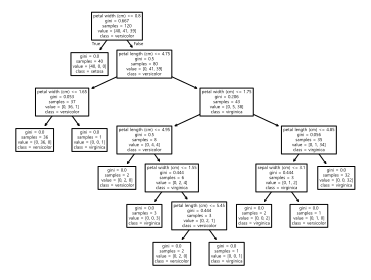

[0.    0.017 0.406 0.577]


In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt, 
          feature_names=iris.feature_names,
          class_names=iris.target_names)
plt.show()
print(dt.feature_importances_) # 결정트리에서는 중요도가 뒤로 갈수록 중요하다.